# Futbol Veri Görselleştirme Ve Bahis Siteleri Analizi

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [4]:
import pandas as pd
import numpy as np

df = pd.read_csv("premier-league.csv")
df.head(2)

,Div,Date,Time,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,...,AvgC<2.5,AHCh,B365CAHH,B365CAHA,PCAHH,PCAHA,MaxCAHH,MaxCAHA,AvgCAHH,AvgCAHA
0,E0,09/08/2019,20:00,Liverpool,Norwich,4,1,H,4,0,...,3.43,-2.25,1.91,1.99,1.94,1.98,1.99,2.07,1.90,1.99
1,E0,10/08/2019,12:30,West Ham,Man City,0,5,A,0,1,...,2.91,1.75,1.95,1.95,1.96,1.97,2.07,1.98,1.97,1.92


In [7]:
df.columns

Index(['Div', 'Date', 'Time', 'HomeTeam', 'AwayTeam', 'FTHG', 'FTAG', 'FTR',
       'HTHG', 'HTAG',
       ...
       'AvgC<2.5', 'AHCh', 'B365CAHH', 'B365CAHA', 'PCAHH', 'PCAHA', 'MaxCAHH',
       'MaxCAHA', 'AvgCAHH', 'AvgCAHA'],
      dtype='object', length=106)

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import warnings
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objs as go
warnings.filterwarnings("ignore")

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 380 entries, 0 to 379
Columns: 106 entries, Div to AvgCAHA
dtypes: float64(82), int64(16), object(8)
memory usage: 314.8+ KB


In [17]:
print('Number of rows in 19-20 dataset:', df.shape[0])
print('Number of columns in 19-20 dataset:', df.shape[1])

Number of rows in 19-20 dataset: 380
Number of columns in 19-20 dataset: 106


In [21]:
df.shape

(380, 106)

In [27]:
df.describe()

,FTHG,FTAG,HTHG,HTAG,HS,AS,HST,AST,HF,AF,...,AvgC<2.5,AHCh,B365CAHH,B365CAHA,PCAHH,PCAHA,MaxCAHH,MaxCAHA,AvgCAHH,AvgCAHA
count,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,...,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000
mean,1.515789,1.205263,0.700000,0.550000,13.323684,11.400000,4.555263,3.994737,10.484211,10.981579,...,2.174132,-0.276974,1.944474,1.960526,1.961053,1.972947,2.013368,2.026921,1.936079,1.950842
std,1.248646,1.200252,0.886427,0.758505,5.417938,5.255278,2.520543,2.489020,3.582759,3.713653,...,0.544434,0.978376,0.129753,0.101650,0.140680,0.105627,0.138995,0.110237,0.127354,0.098890
min,0.000000,0.000000,0.000000,0.000000,2.000000,1.000000,0.000000,0.000000,0.000000,1.000000,...,1.450000,-3.750000,1.670000,1.270000,1.710000,1.300000,1.800000,1.300000,1.700000,1.280000
25%,1.000000,0.000000,0.000000,0.000000,10.000000,8.000000,3.000000,2.000000,8.000000,8.000000,...,1.800000,-0.750000,1.870000,1.890000,1.880000,1.890000,1.930000,1.950000,1.860000,1.880000
50%,1.000000,1.000000,0.000000,0.000000,13.000000,11.000000,4.000000,4.000000,10.000000,11.000000,...,2.040000,-0.250000,1.950000,1.970000,1.960000,1.970000,2.000000,2.030000,1.930000,1.950000
75%,2.000000,2.000000,1.000000,1.000000,16.000000,14.000000,6.000000,5.000000,13.000000,13.000000,...,2.400000,0.250000,2.020000,2.040000,2.032500,2.050000,2.070000,2.100000,2.000000,2.020000
max,8.000000,9.000000,5.000000,5.000000,31.000000,26.000000,13.000000,15.000000,23.000000,24.000000,...,5.770000,3.000000,3.550000,2.200000,3.930000,2.290000,3.950000,2.300000,3.660000,2.240000


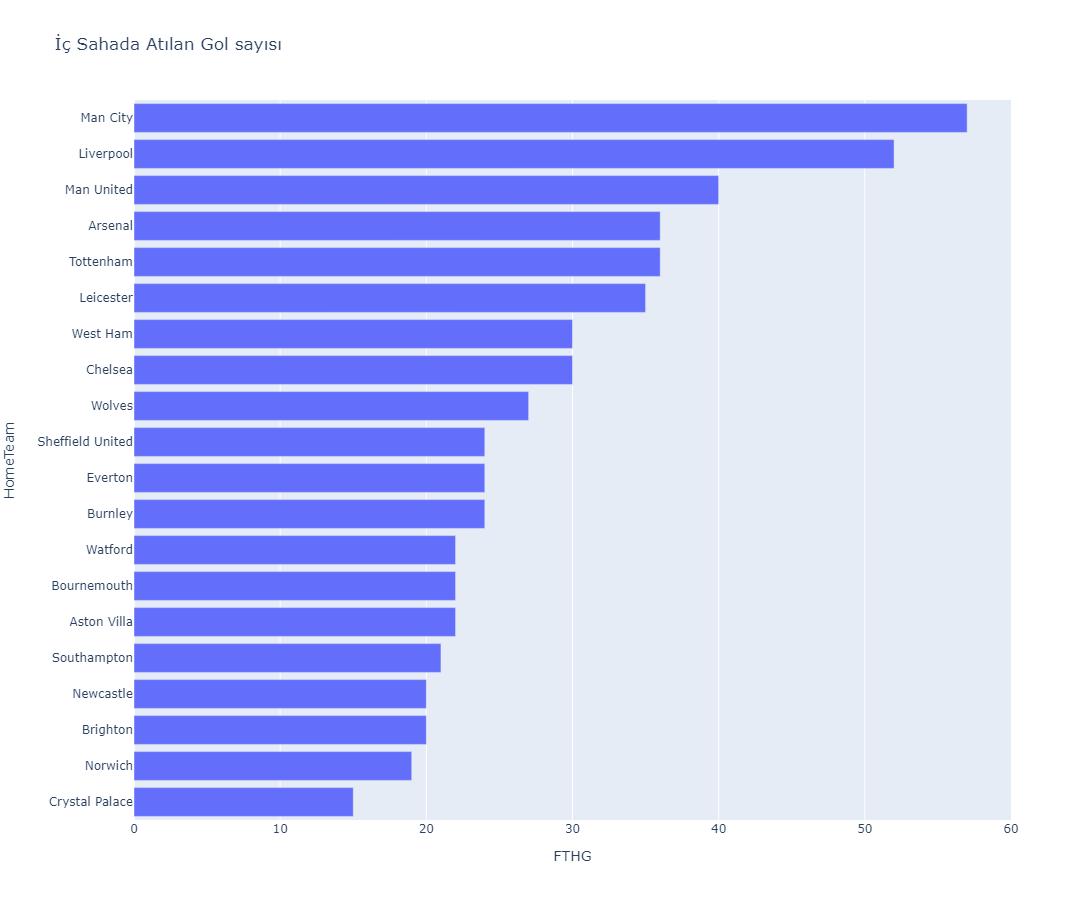

In [987]:
home_team=pd.DataFrame(df.groupby('HomeTeam')['FTHG'].sum().index)
home_team['FTHG']=df.groupby('HomeTeam')['FTHG'].sum().values
home_team = home_team.sort_values('FTHG')
fig = px.bar(
    home_team, 
    x='FTHG',
    y='HomeTeam', 
    orientation='h',
    title='İç Sahada Atılan Gol sayısı', 
    height=900, 
    width=800
)
fig.show()

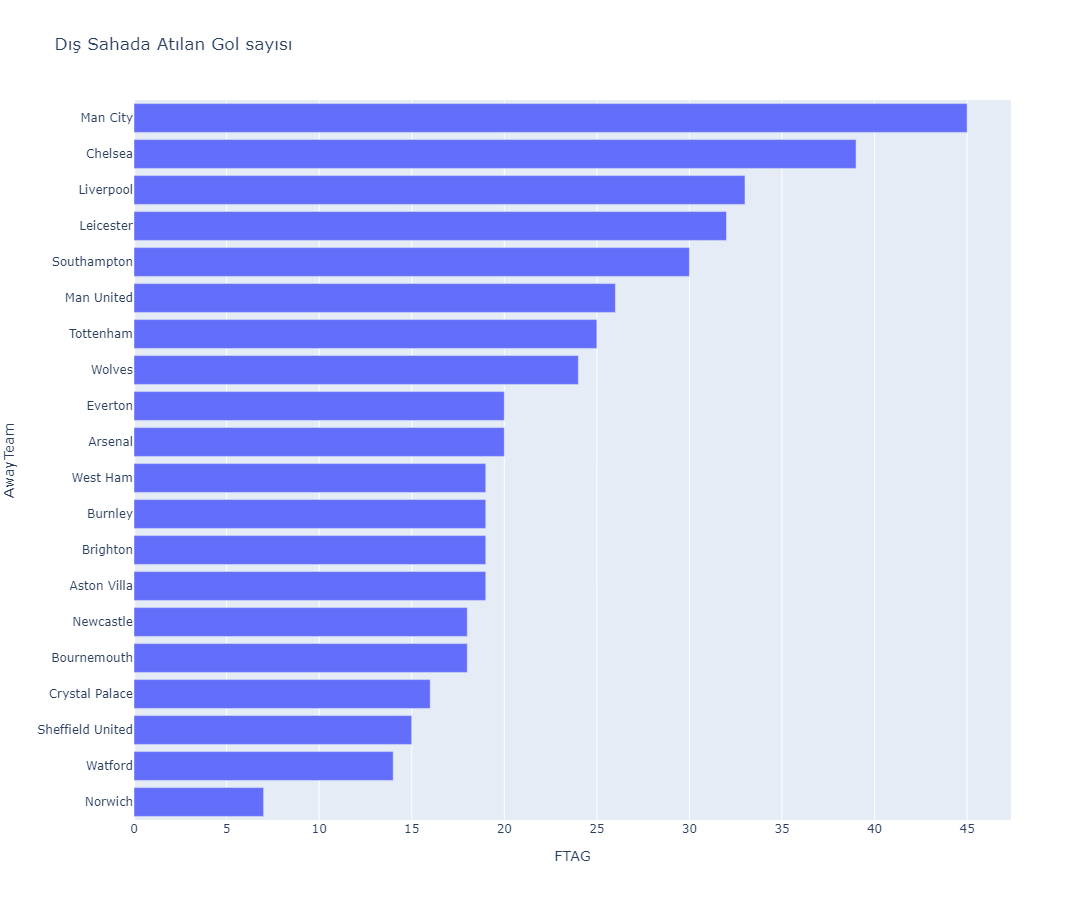

In [989]:
away_team=pd.DataFrame(df.groupby('AwayTeam')['FTAG'].sum().index)
away_team['FTAG']=df.groupby('AwayTeam')['FTAG'].sum().values
away_team = away_team.sort_values('FTAG')
fig = px.bar(
    away_team, 
    x='FTAG',
    y='AwayTeam', 
    orientation='h',
    title='Dış Sahada Atılan Gol sayısı', 
    height=900, 
    width=800
)
fig.show()

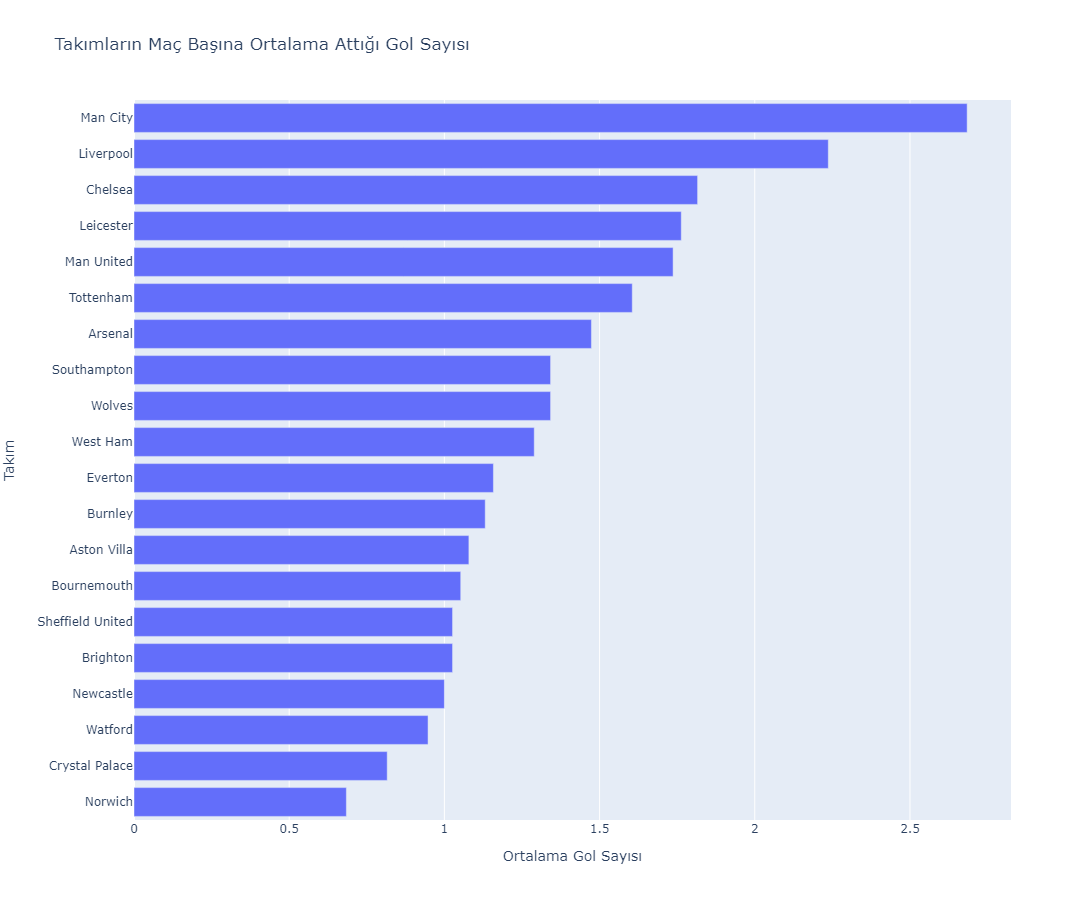

In [198]:
matches_per_team = df['HomeTeam'].value_counts() + df['AwayTeam'].value_counts()
matches_per_team = matches_per_team.reset_index()
matches_per_team.columns = ['Team', 'Matches']

goals_per_team_home = df.groupby('HomeTeam')['FTHG'].sum()
goals_per_team_away = df.groupby('AwayTeam')['FTAG'].sum()
goals_per_team = goals_per_team_home.add(goals_per_team_away, fill_value=0)
goals_per_team = goals_per_team.reset_index()
goals_per_team.columns = ['Team', 'TotalGoals']

team_stats = pd.merge(matches_per_team, goals_per_team, on='Team')

team_stats['AvgGoalsPerMatch'] = team_stats['TotalGoals'] / team_stats['Matches']

team_stats = team_stats.sort_values(by='AvgGoalsPerMatch', ascending=True)

fig = px.bar(
    team_stats,
    x='AvgGoalsPerMatch',
    y='Team',
    orientation='h',
    title='Takımların Maç Başına Ortalama Attığı Gol Sayısı',
    height=900,
    width=800,
    labels={'AvgGoalsPerMatch': 'Ortalama Gol Sayısı', 'Team': 'Takım'},
    hover_data={'AvgGoalsPerMatch': ':.2f'}
)
fig.show()

In [162]:
df[(df["HomeTeam"] == "Man City")| (df["AwayTeam"] == "Man City")]

,Div,Date,Time,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,...,AHCh,B365CAHH,B365CAHA,PCAHH,PCAHA,MaxCAHH,MaxCAHA,AvgCAHH,AvgCAHA,total_goals
1,E0,10/08/2019,12:30,West Ham,Man City,0,5,A,0,1,...,1.75,1.95,1.95,1.96,1.97,2.07,1.98,1.97,1.92,5
16,E0,17/08/2019,17:30,Man City,Tottenham,2,2,D,2,1,...,-1.50,2.05,1.88,2.04,1.89,2.07,1.97,2.00,1.88,4
27,E0,25/08/2019,14:00,Bournemouth,Man City,1,3,A,1,2,...,2.25,1.92,2.01,1.95,1.99,2.03,2.09,1.91,1.98,4
34,E0,31/08/2019,15:00,Man City,Brighton,4,0,H,2,0,...,-2.50,1.98,1.95,1.96,1.96,2.00,2.05,1.94,1.95,4
46,E0,14/09/2019,17:30,Norwich,Man City,3,2,H,2,1,...,3.00,1.72,2.07,1.78,2.19,1.99,2.30,1.77,2.14,5
54,E0,21/09/2019,15:00,Man City,Watford,8,0,H,5,0,...,-2.50,1.90,2.03,1.93,1.99,1.93,2.16,1.88,2.00,8
67,E0,28/09/2019,17:30,Everton,Man City,1,3,A,1,1,...,1.50,1.72,2.07,1.81,2.14,1.96,2.17,1.83,2.05,4
77,E0,06/10/2019,14:00,Man City,Wolves,0,2,A,0,0,...,-2.25,2.04,1.89,2.04,1.88,2.06,2.04,1.99,1.90,2
87,E0,19/10/2019,17:30,Crystal Palace,Man City,0,2,A,0,2,...,2.00,1.87,2.03,1.92,2.02,1.95,2.07,1.86,2.01,2
91,E0,26/10/2019,12:30,Man City,Aston Villa,3,0,H,0,0,...,-3.25,2.07,1.72,2.16,1.78,2.21,1.88,2.15,1.77,3


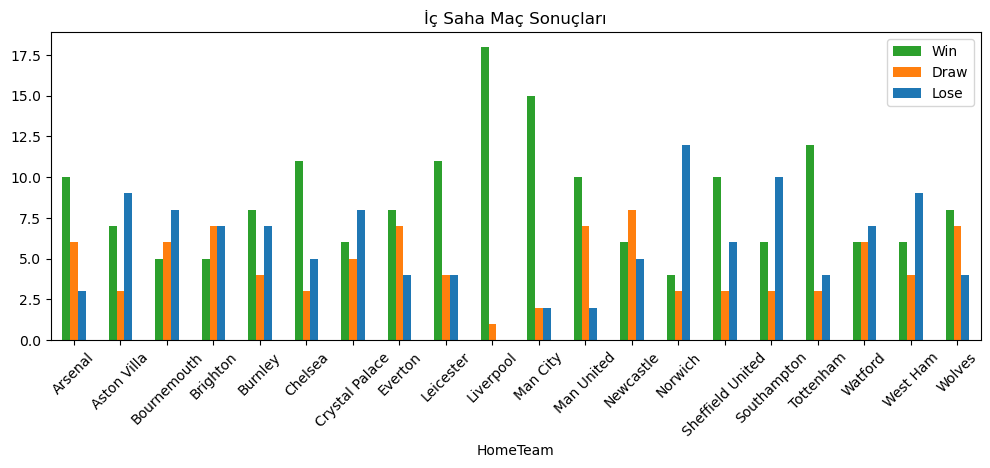

In [1055]:
import matplotlib.pyplot as plt
home_results = df.groupby('HomeTeam')['FTR'].value_counts().unstack().fillna(0)
home_results = home_results[['H', 'D', 'A']]
colors = {'A': '#1f77b4', 'D': '#FF7F0E', 'H': '#2CA02C'}
ax = home_results.plot(kind='bar', figsize=(12, 4), color=[colors[col] for col in home_results.columns])
ax.set_title("İç Saha Maç Sonuçları")
ax.legend(['Win', 'Draw', 'Lose'])
plt.xticks(rotation=45, fontsize=10)
plt.show()

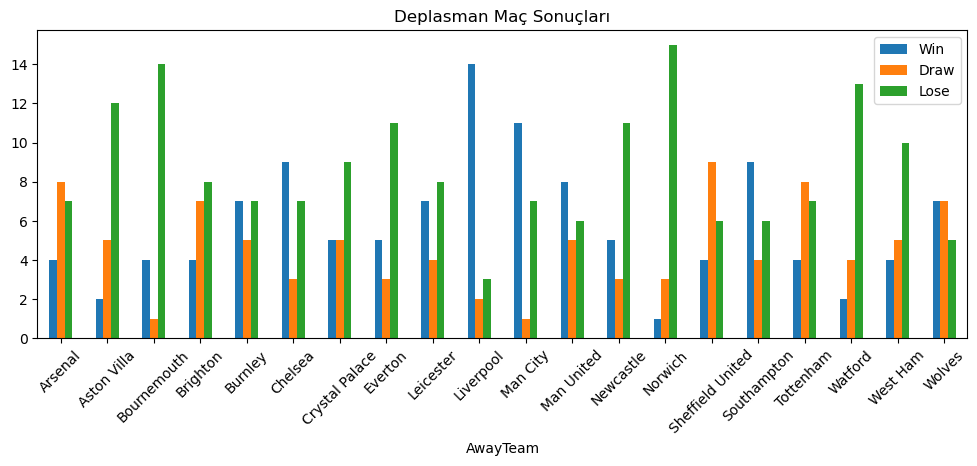

In [1051]:
import matplotlib.pyplot as plt
away_results = df.groupby('AwayTeam')['FTR'].value_counts().unstack().fillna(0)
away_results = away_results[['A', 'D', 'H']]
colors = {'A': '#1f77b4', 'D': '#FF7F0E', 'H': '#2CA02C'}
ax = away_results.plot(kind='bar', figsize=(12, 4), color=[colors[col] for col in away_results.columns])
ax.set_title("Deplasman Maç Sonuçları")
ax.legend(['Win', 'Draw', 'Lose'])
plt.xticks(rotation=45, fontsize=10)
plt.show()

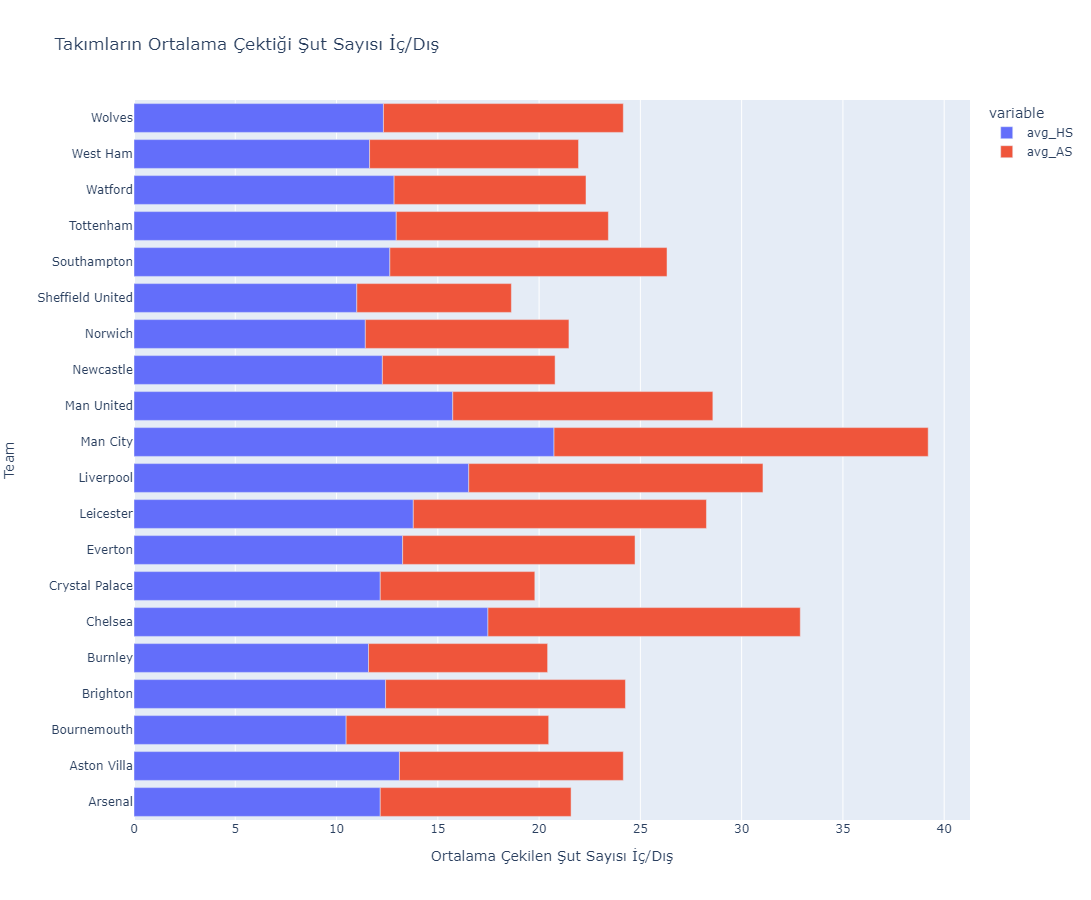

In [1061]:
shots=pd.DataFrame(df.groupby('HomeTeam')['HS'].mean().index)
shots['avg_HS']=df.groupby('HomeTeam')['HS'].mean().values
shots['avg_AS']=df.groupby('AwayTeam')['AS'].mean().values
#shots = home_team.sort_values('avg_HS')
fig = px.bar(
    shots, 
    x=['avg_HS', 'avg_AS'],
    y='HomeTeam',
    labels={'HomeTeam':'Team', 'value':'Ortalama Çekilen Şut Sayısı İç/Dış'},
    orientation='h', 
    title='Takımların Ortalama Çektiği Şut Sayısı İç/Dış', 
    height=900, 
    width=800
)
fig.show()

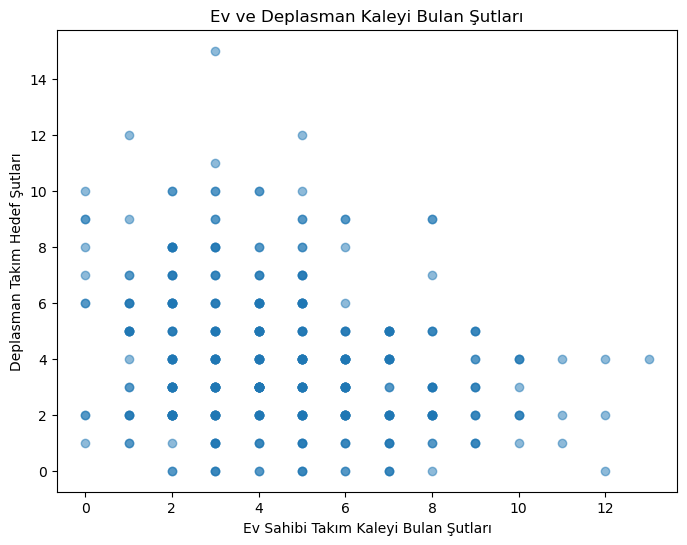

In [706]:
plt.figure(figsize=(8, 6))
plt.scatter(dfprofit['HST'], dfprofit['AST'], alpha=0.5)
plt.title('Ev ve Deplasman Kaleyi Bulan Şutları')
plt.xlabel('Ev Sahibi Takım Kaleyi Bulan Şutları')
plt.ylabel('Deplasman Takım Hedef Şutları')
plt.show()

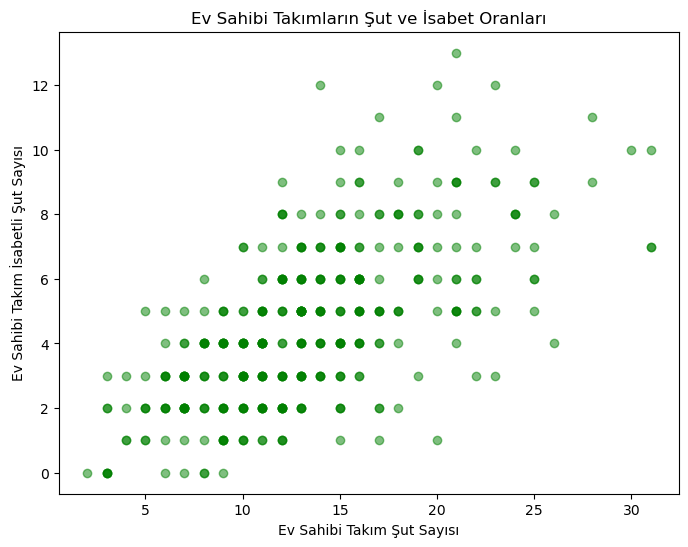

In [790]:
plt.figure(figsize=(8, 6))
plt.scatter(df['HS'], df['HST'], color='green', alpha=0.5)
plt.xlabel('Ev Sahibi Takım Şut Sayısı')
plt.ylabel('Ev Sahibi Takım İsabetli Şut Sayısı')
plt.title('Ev Sahibi Takımların Şut ve İsabet Oranları')
plt.show()

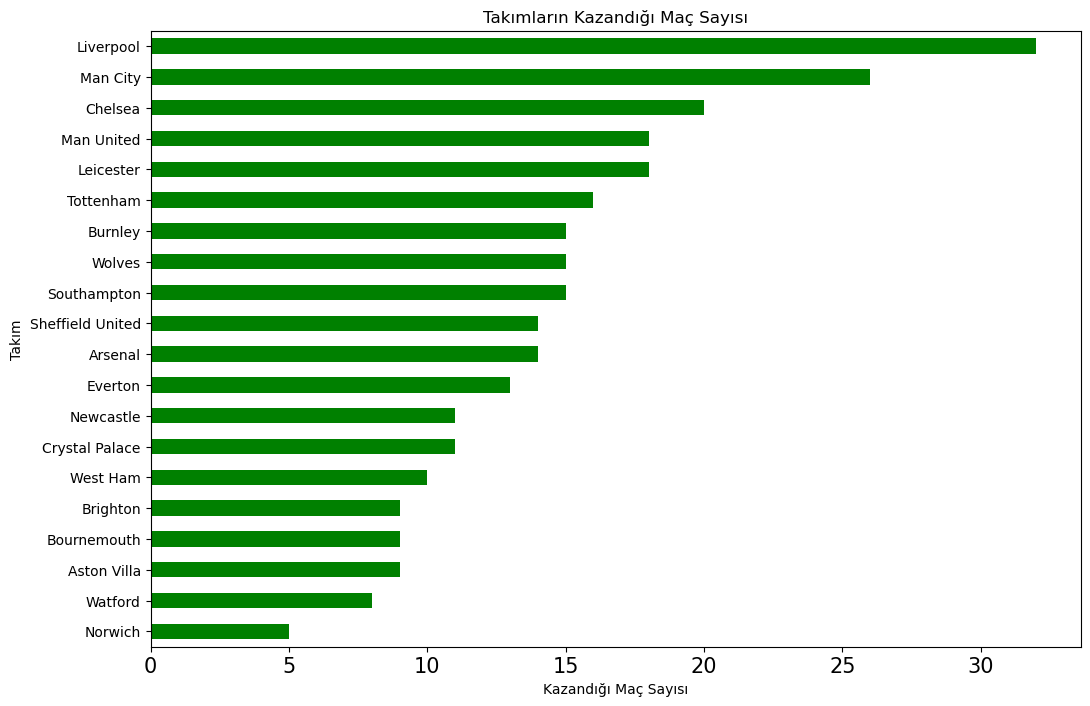

In [843]:
team_wins = df[df['FTR'] == 'H']['HomeTeam'].value_counts().add(df[df['FTR'] == 'A']['AwayTeam'].value_counts(), fill_value=0)

plt.figure(figsize=(12, 8))
team_wins.sort_values(ascending=True).plot(kind='barh', color='green')
plt.title('Takımların Kazandığı Maç Sayısı')
plt.xlabel('Kazandığı Maç Sayısı')
plt.ylabel('Takım')
plt.xticks(fontsize=15)
plt.show()

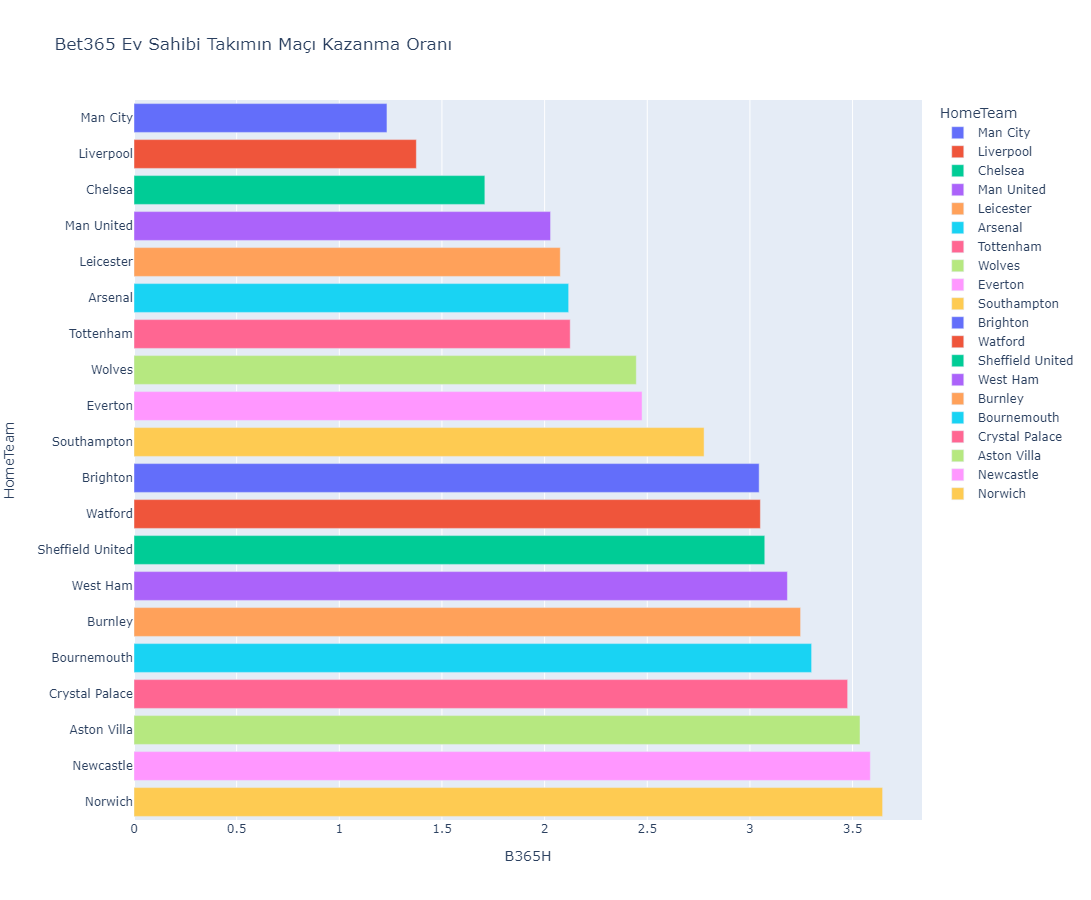

In [1063]:
home_team=pd.DataFrame(df.groupby('HomeTeam')['B365H'].mean().index)
home_team['B365H']=df.groupby('HomeTeam')['B365H'].mean().values
home_team = home_team.sort_values('B365H')

# Değerleri büyükten küçüğe sıralamak için
# home_team = home_team.sort_values('B365H', ascending=False)

fig = px.bar(
    home_team, 
    x='B365H',
    y='HomeTeam', 
    orientation='h',
    color='HomeTeam',
    title='Bet365 Ev Sahibi Takımın Maçı Kazanma Oranı', 
    height=900, 
    width=800
)
fig.show()

In [72]:
df[(df["Referee"] == "D England")]

,Div,Date,Time,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,...,AHCh,B365CAHH,B365CAHA,PCAHH,PCAHA,MaxCAHH,MaxCAHA,AvgCAHH,AvgCAHA,total_goals
224,E0,18/01/2020,15:00,Southampton,Wolves,2,3,A,2,0,...,0.0,1.81,2.13,1.83,2.11,1.86,2.2,1.79,2.09,5


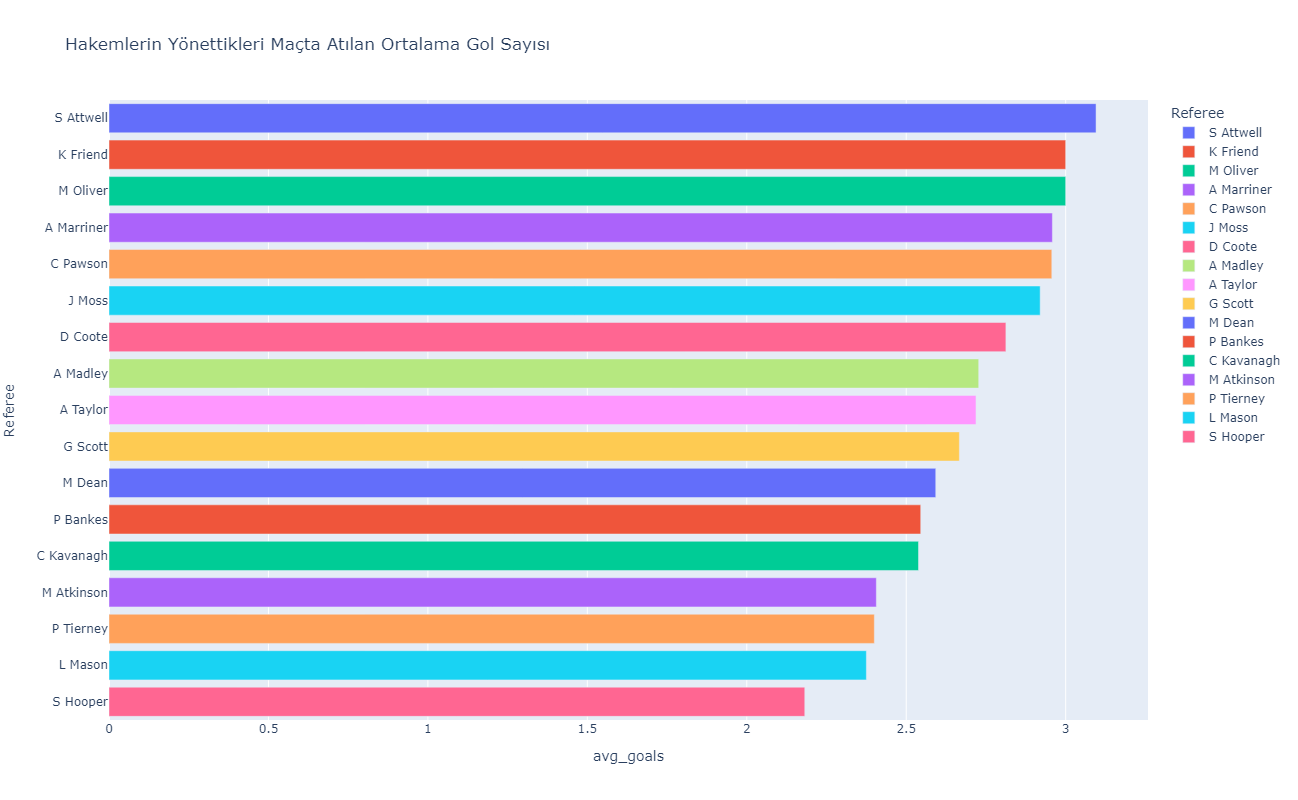

In [136]:
avg_goals_per_referee = df.groupby('Referee')['total_goals'].mean().reset_index()
avg_goals_per_referee.columns = ['Referee', 'avg_goals']

games_per_referee = df['Referee'].value_counts().reset_index()
games_per_referee.columns = ['Referee', 'games']

merged_data = pd.merge(avg_goals_per_referee, games_per_referee, on='Referee')

filtered_data = merged_data[merged_data['games'] > 10]

filtered_data = filtered_data.sort_values(by='avg_goals', ascending=False)

fig = px.bar(
    filtered_data,
    y='Referee',
    x='avg_goals',
    color='Referee',
    orientation='h',
    title='Hakemlerin Yönettikleri Maçta Atılan Ortalama Gol Sayısı',
    height=800,
    width=700
)
fig.show()

<Figure size 1400x700 with 0 Axes>

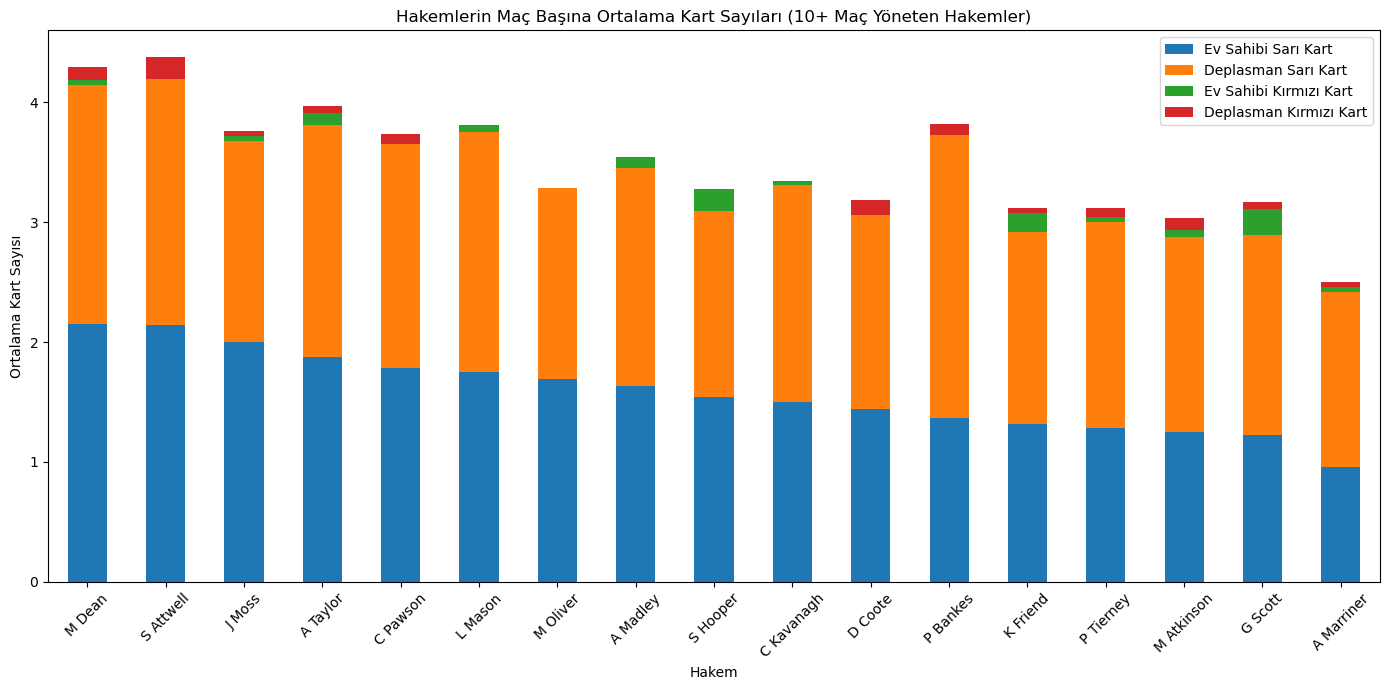

In [827]:
import pandas as pd
import matplotlib.pyplot as plt

# Hakemlerin yönettikleri maçlardaki kart istatistiklerini hesaplamak için 
referee_stats = df.groupby('Referee').agg({
    'HY': 'sum',
    'AY': 'sum',
    'HR': 'sum',
    'AR': 'sum',
    'HomeTeam': 'count'  # Maç sayısı
}).rename(columns={'HomeTeam': 'MatchCount'})

# 10'dan az maç yöneten hakemleri filtreledik istemiyoruz!
referee_stats = referee_stats[referee_stats['MatchCount'] >= 10]

referee_stats['Avg_HY'] = referee_stats['HY'] / referee_stats['MatchCount']
referee_stats['Avg_AY'] = referee_stats['AY'] / referee_stats['MatchCount']
referee_stats['Avg_HR'] = referee_stats['HR'] / referee_stats['MatchCount']
referee_stats['Avg_AR'] = referee_stats['AR'] / referee_stats['MatchCount']

referee_stats = referee_stats.sort_values(by='Avg_HY', ascending=False)

plt.figure(figsize=(14, 7))
referee_stats[['Avg_HY', 'Avg_AY', 'Avg_HR', 'Avg_AR']].plot(kind='bar', stacked=True, figsize=(14, 7))
plt.title('Hakemlerin Maç Başına Ortalama Kart Sayıları (10+ Maç Yöneten Hakemler)')
plt.xlabel('Hakem')
plt.ylabel('Ortalama Kart Sayısı')
plt.legend(['Ev Sahibi Sarı Kart', 'Deplasman Sarı Kart', 'Ev Sahibi Kırmızı Kart', 'Deplasman Kırmızı Kart'])
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

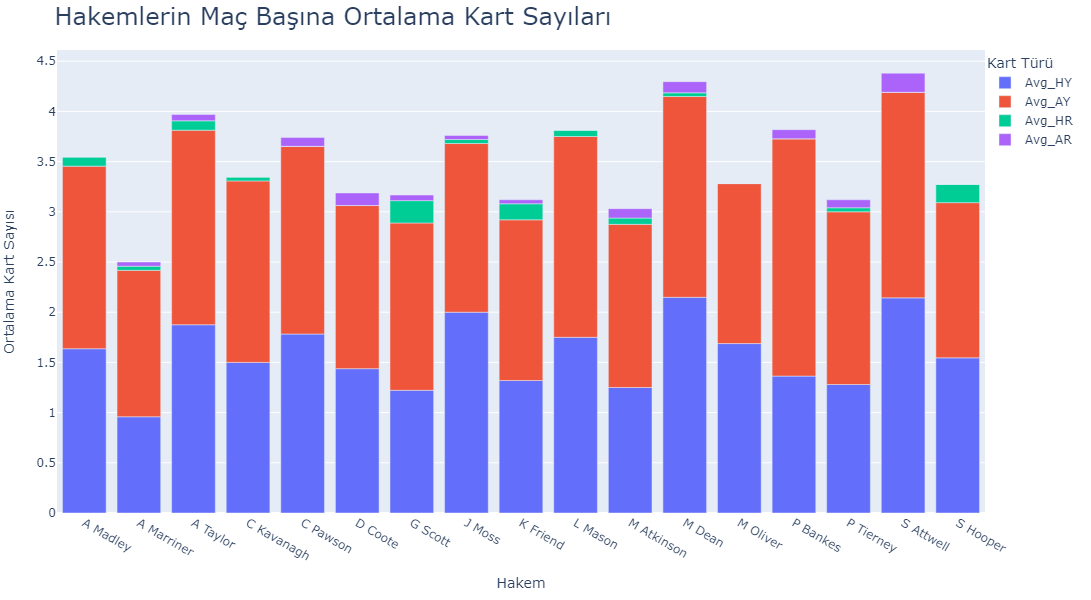

In [895]:
import pandas as pd
import plotly.express as px

referee_stats = df.groupby('Referee').agg({
    'HY': 'sum',
    'AY': 'sum',
    'HR': 'sum',
    'AR': 'sum',
    'HomeTeam': 'count'  # Maç sayısı
}).rename(columns={'HomeTeam': 'MatchCount'})

referee_stats['Avg_HY'] = referee_stats['HY'] / referee_stats['MatchCount']
referee_stats['Avg_AY'] = referee_stats['AY'] / referee_stats['MatchCount']
referee_stats['Avg_HR'] = referee_stats['HR'] / referee_stats['MatchCount']
referee_stats['Avg_AR'] = referee_stats['AR'] / referee_stats['MatchCount']

referee_stats = referee_stats[referee_stats['MatchCount'] >= 10]

fig = px.bar(referee_stats, 
             x=referee_stats.index, 
             y=['Avg_HY', 'Avg_AY', 'Avg_HR', 'Avg_AR'], 
             title='Hakemlerin Maç Başına Ortalama Kart Sayıları', 
             labels={'value': 'Ortalama Kart Sayısı', 'variable': 'Kart Türü'})

fig.update_layout(
    width=1000,
    height=600,
    title_font_size=24,
    xaxis_title='Hakem',
    yaxis_title='Ortalama Kart Sayısı',
    legend_title='Kart Türü',
    legend=dict(
        x=1,
        y=1,
        bgcolor='rgba(255, 255, 255, 0)',
        bordercolor='rgba(0, 0, 0, 0)'
    ),
    margin=dict(t=50, b=50, l=50, r=50)
)

fig.show()

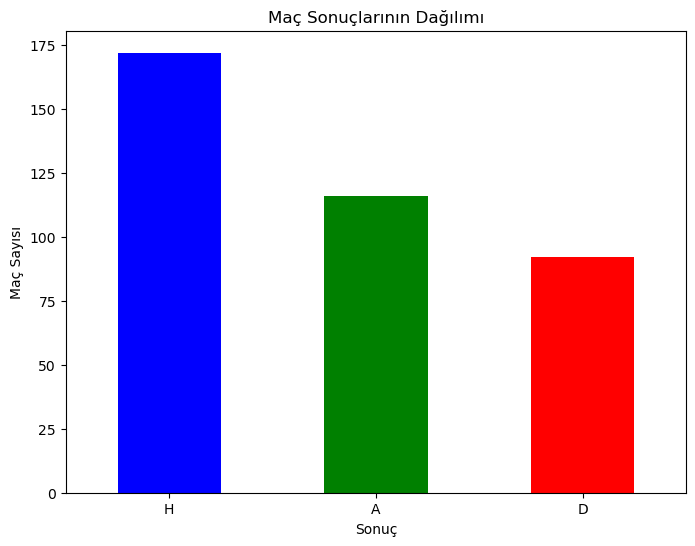

In [247]:
import matplotlib.pyplot as plt

result_counts = df['FTR'].value_counts()

plt.figure(figsize=(8, 6))
result_counts.plot(kind='bar', color=['blue', 'green', 'red'])
plt.title('Maç Sonuçlarının Dağılımı')
plt.xlabel('Sonuç')
plt.ylabel('Maç Sayısı')
plt.xticks(rotation=0)
plt.show()

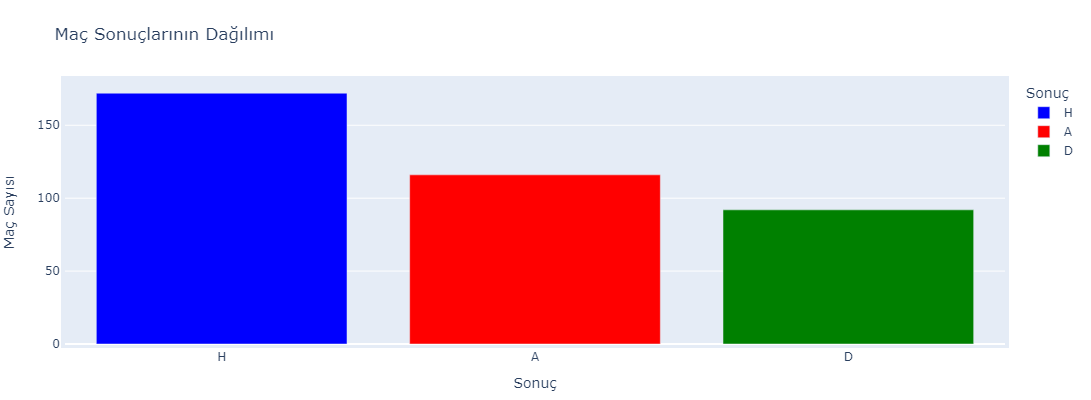

In [947]:
import pandas as pd
import plotly.express as px

result_counts = df['FTR'].value_counts().reset_index()
result_counts.columns = ['Result', 'Count']

colors = {'H': 'blue', 'D': 'green', 'A': 'red'}

fig = px.bar(result_counts, x='Result', y='Count', color='Result', color_discrete_map=colors,
             title='Maç Sonuçlarının Dağılımı', labels={'Result': 'Sonuç', 'Count': 'Maç Sayısı'})

fig.update_layout(
    autosize=False,
    width=500,
    height=400,
    margin=dict(l=50, r=50, b=50, t=80, pad=4)
)

fig.show()

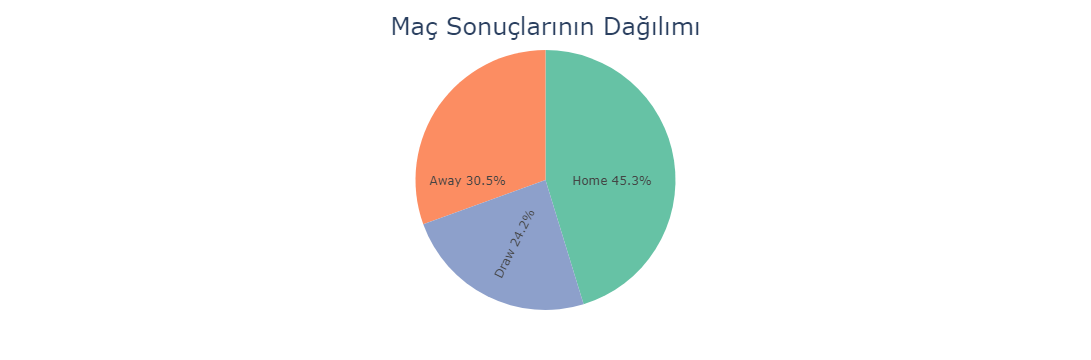

In [883]:
import pandas as pd
import plotly.express as px

match_results = df['FTR'].value_counts().reset_index()
match_results.columns = ['Result', 'Count']

labels = {'H': 'Home', 'D': 'Draw', 'A': 'Away'}

fig = px.pie(match_results, names='Result', values='Count', title='Maç Sonuçlarının Dağılımı', 
             color_discrete_sequence=px.colors.qualitative.Set2)

fig.update_traces(textposition='inside', textinfo='percent', hoverinfo='label+percent',
                  text=[labels[result] for result in match_results['Result']],
                  texttemplate='%{text}\n%{percent:.1%}', insidetextorientation='radial')

fig.update_layout(
    title_font_size=24,
    title_x=0.5,
    title_y=0.95,
    margin=dict(t=50, b=50, l=50, r=50),
    showlegend=False
)

fig.show()

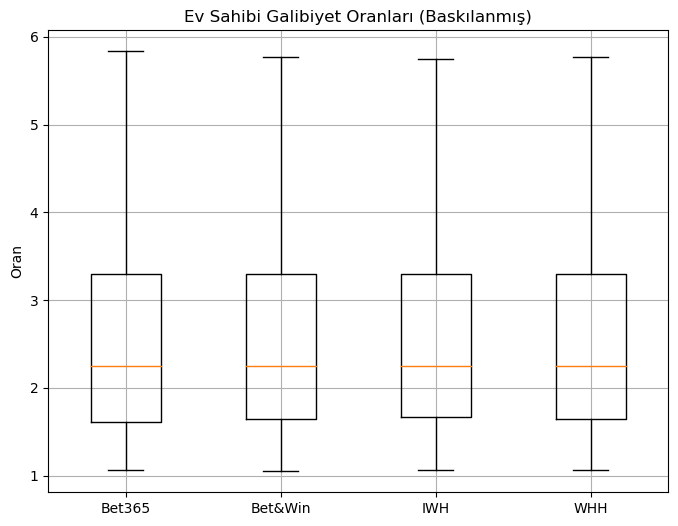

In [1079]:
Q1 = df['B365H'].quantile(0.25)
Q3 = df['B365H'].quantile(0.75)
IQR = Q3 - Q1
ust_sinir = Q3 + 1.5 * IQR

df['B365H'] = df['B365H'].apply(lambda x: ust_sinir if x > ust_sinir else x)

plt.figure(figsize=(8, 6))
plt.boxplot([df['B365H'], df['BWH'], df['IWH'], df['WHH']], labels=['Bet365', 'Bet&Win', 'IWH', "WHH"])
plt.title('Ev Sahibi Galibiyet Oranları (Baskılanmış)')
plt.ylabel('Oran')
plt.grid(True)
plt.show()

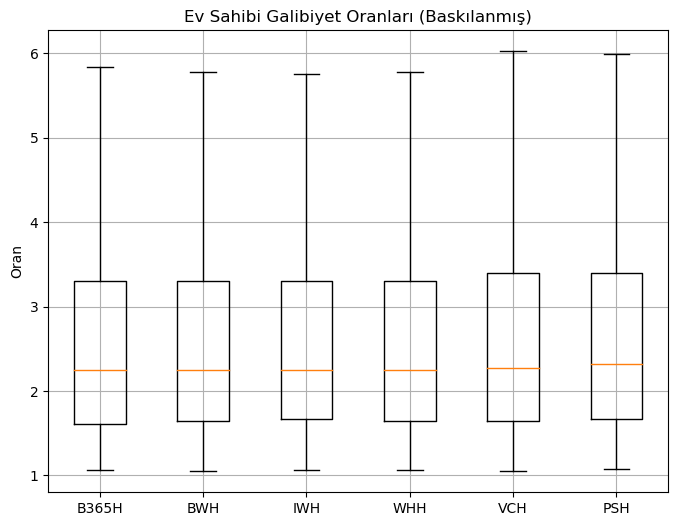

In [415]:
import pandas as pd

numeric_columns = ['B365H', 'BWH', 'IWH', 'WHH',"VCH","PSH"]
df[numeric_columns] = df[numeric_columns].apply(pd.to_numeric, errors='coerce')  

def baski(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    alt_sinir = Q1 - 1.5 * IQR
    ust_sinir = Q3 + 1.5 * IQR
    return series.apply(lambda x: ust_sinir if x > ust_sinir else x)

for col in numeric_columns:
    df[col] = baski(df[col])

import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.boxplot([df[col] for col in numeric_columns], labels=numeric_columns)
plt.title('Ev Sahibi Galibiyet Oranları (Baskılanmış)')
plt.ylabel('Oran')
plt.grid(True)
plt.show()

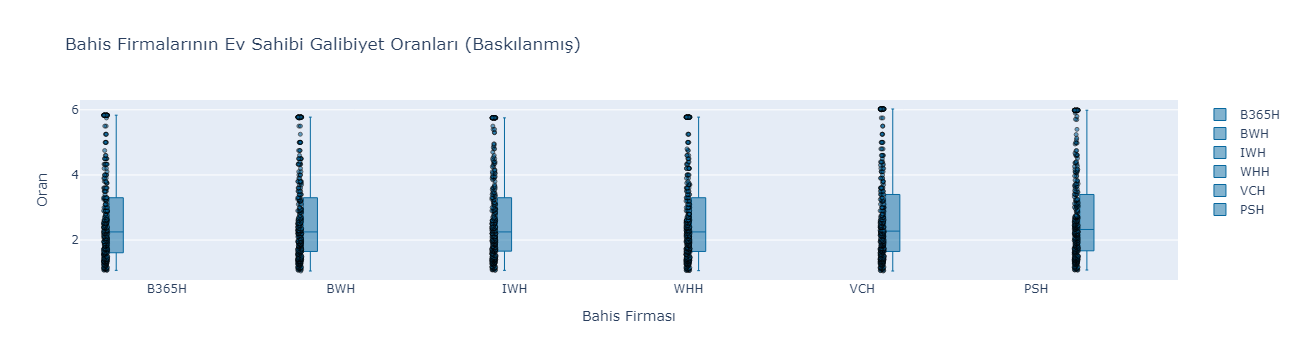

In [429]:
import plotly.graph_objects as go

box_data = [df[col] for col in numeric_columns]
box_labels = numeric_columns

fig = go.Figure()

for data, label in zip(box_data, box_labels):
    fig.add_trace(go.Box(
        y=data,
        name=label,
        boxpoints='all',  
        jitter=0.3,  
        whiskerwidth=0.2,  # Whisker genişliği
        fillcolor='rgba(7, 104, 159, 0.5)',  # Kutu dolgusu rengi
        marker=dict(
            size=4,  
            color='rgb(7, 104, 159)',  
            opacity=0.6, 
            symbol='circle',  
            line=dict(
                color='rgb(0, 0, 0)',  
                width=1  # Nokta kenarlık genişliği
            )
        ),
        line=dict(
            color='rgb(7, 104, 159)',  # Kutu kenar rengi
            width=1  # Kutu kenar genişliği
        ),
        hoverinfo='y'  
    ))

fig.update_layout(
    title='Bahis Firmalarının Ev Sahibi Galibiyet Oranları (Baskılanmış)',
    yaxis_title='Oran',
    xaxis_title='Bahis Firması',
    boxmode='group'  # Kutuları grupla
)

fig.show()

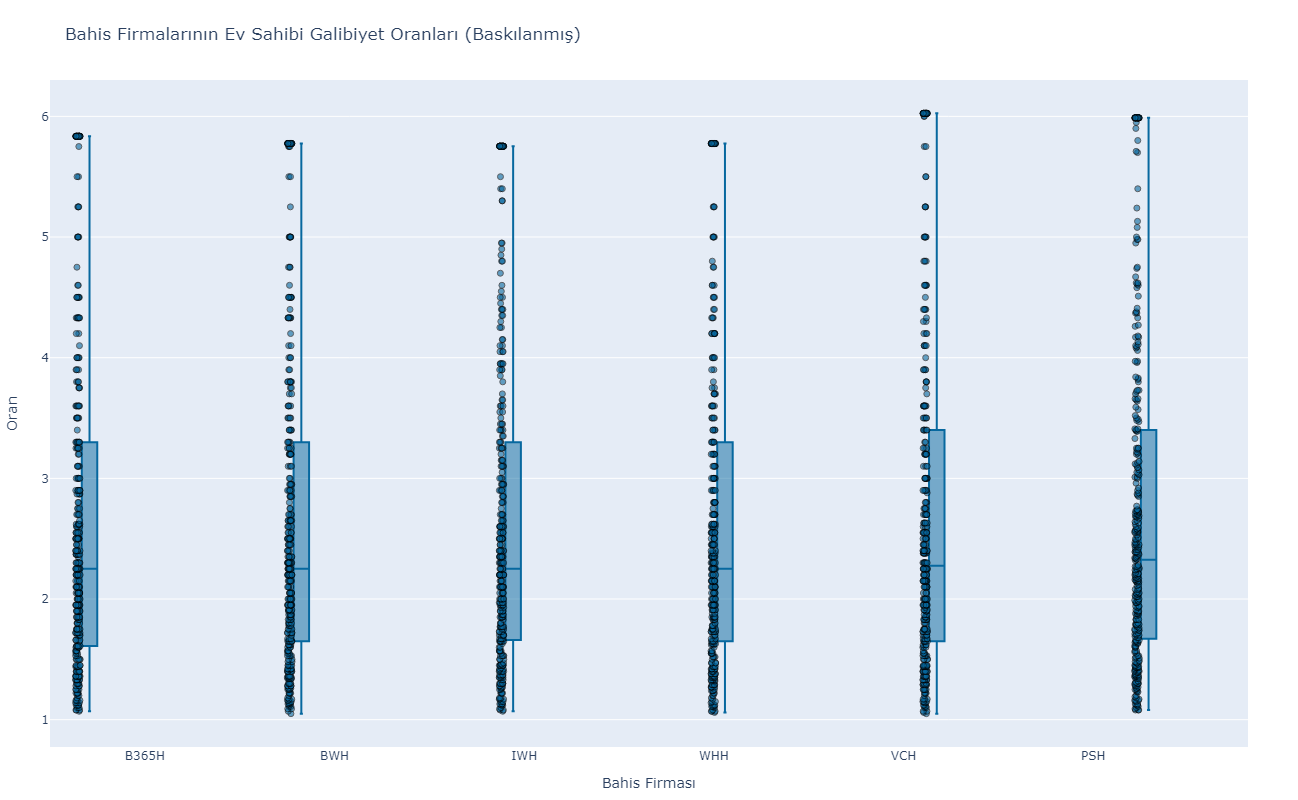

In [433]:
import plotly.graph_objects as go

box_data = [df[col] for col in numeric_columns]
box_labels = numeric_columns

fig = go.Figure()

for data, label in zip(box_data, box_labels):
    fig.add_trace(go.Box(
        y=data,
        name=label,
        boxpoints='all',
        jitter=0.3,  
        whiskerwidth=0.2,  
        fillcolor='rgba(7, 104, 159, 0.5)',  
        marker=dict(
            size=6,  
            color='rgb(7, 104, 159)', 
            opacity=0.6,  
            symbol='circle',  
            line=dict(
                color='rgb(0, 0, 0)',  
                width=1  
            )
        ),
        line=dict(
            color='rgb(7, 104, 159)',  
            width=2
        ),
        hoverinfo='y'  
    ))

fig.update_layout(
    title='Bahis Firmalarının Ev Sahibi Galibiyet Oranları (Baskılanmış)',
    yaxis_title='Oran',
    xaxis_title='Bahis Firması',
    boxmode='group',  
    height=800,  
    width=1000,  
    margin=dict(l=50, r=50, t=80, b=50), 
    showlegend=False  
)


fig.show()

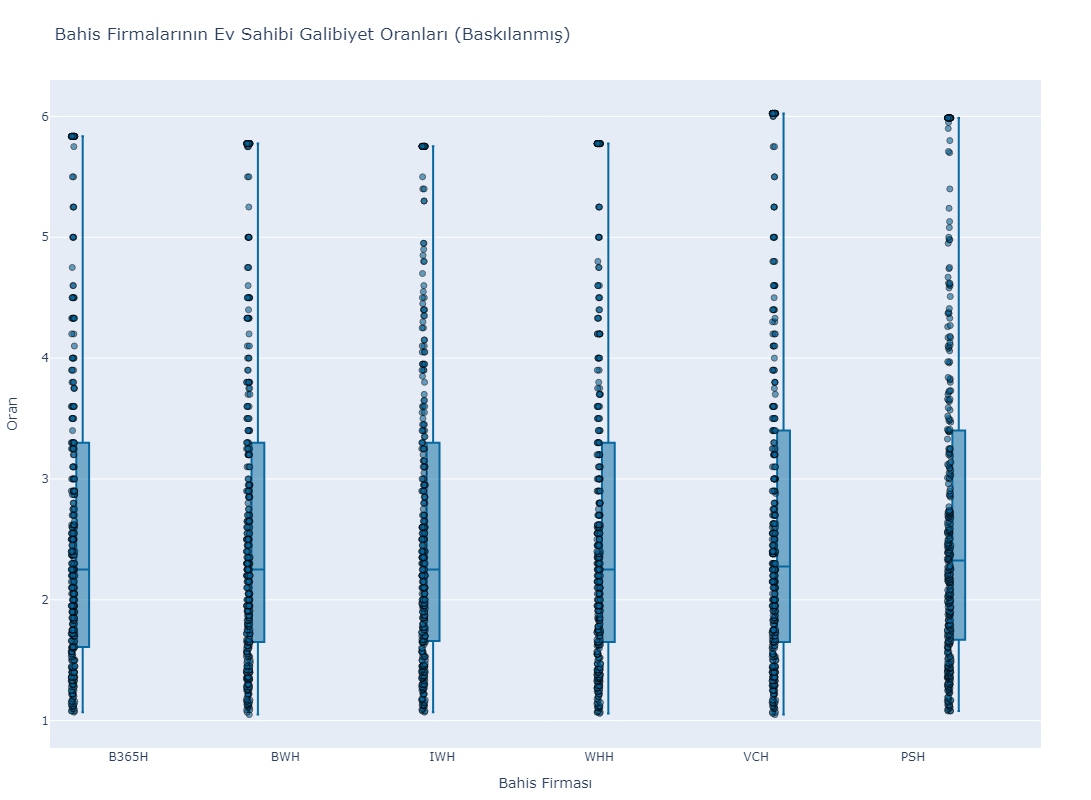

In [433]:
import plotly.graph_objects as go

box_data = [df[col] for col in numeric_columns]
box_labels = numeric_columns

fig = go.Figure()

for data, label in zip(box_data, box_labels):
    fig.add_trace(go.Box(
        y=data,
        name=label,
        boxpoints='all',  
        jitter=0.3,  
        whiskerwidth=0.2,  
        fillcolor='rgba(7, 104, 159, 0.5)',  
        marker=dict(
            size=6,  
            color='rgb(7, 104, 159)',  
            opacity=0.6,  
            symbol='circle', 
            line=dict(
                color='rgb(0, 0, 0)',  
                width=1  
            )
        ),
        line=dict(
            color='rgb(7, 104, 159)', 
            width=2  
        ),
        hoverinfo='y'  
    ))


fig.update_layout(
    title='Bahis Firmalarının Ev Sahibi Galibiyet Oranları (Baskılanmış)',
    yaxis_title='Oran',
    xaxis_title='Bahis Firması',
    boxmode='group',  
    height=800,  
    width=1000, 
    margin=dict(l=50, r=50, t=80, b=50),  
    showlegend=False  
)


fig.show()

# Bahis Sitelerinin Galibiyet Oranlarını Deniyoruz

In [455]:
df[["B365H","B365A","BWH","BWA","IWH","WHH","VCH","PSH","HomeTeam","AwayTeam","FTR"]]

,B365H,B365A,BWH,BWA,IWH,WHH,VCH,PSH,HomeTeam,AwayTeam,FTR
0,1.140,19.00,1.140,18.50,1.1500,1.120,1.140,1.1500,Liverpool,Norwich,H
1,5.835,1.22,5.775,1.26,5.7525,5.775,6.025,5.9875,West Ham,Man City,A
2,1.950,3.60,1.950,3.90,1.9700,2.000,2.000,2.0400,Bournemouth,Sheffield United,D
3,2.620,2.75,2.650,2.75,2.6500,2.700,2.700,2.7100,Burnley,Southampton,H
4,3.000,2.37,3.200,2.35,3.1000,3.100,3.200,3.2100,Crystal Palace,Everton,D
...,...,...,...,...,...,...,...,...,...,...,...
375,3.250,2.20,3.200,2.20,3.1500,3.200,3.200,3.2500,Leicester,Man United,A
376,1.080,26.00,1.050,41.00,1.0700,1.070,1.050,1.0800,Man City,Norwich,H
377,5.835,1.36,5.775,1.42,5.7525,5.775,6.025,5.9875,Newcastle,Liverpool,A
378,2.150,3.30,2.200,3.20,2.2000,2.150,2.150,2.1800,Southampton,Sheffield United,H


In [437]:
df.columns

Index(['Div', 'Date', 'Time', 'HomeTeam', 'AwayTeam', 'FTHG', 'FTAG', 'FTR',
       'HTHG', 'HTAG',
       ...
       'AHCh', 'B365CAHH', 'B365CAHA', 'PCAHH', 'PCAHA', 'MaxCAHH', 'MaxCAHA',
       'AvgCAHH', 'AvgCAHA', 'total_goals'],
      dtype='object', length=107)

In [457]:
dfprofit = df.copy()

In [495]:
def calculate_profit(row):
    if row['FTR'] == 'H' and row['B365H'] < row['B365A']:  
        profit = 100 * row['B365H']
    elif row['FTR'] == 'A' and row['B365A'] < row['B365H']:  
        profit = 100 * row['B365A']
    else:
        profit = -100  # Diğer durumlar için -100
    return round(profit, 1)

dfprofit['Profit'] = dfprofit.apply(calculate_profit, axis=1)

dfprofit[['HomeTeam', 'AwayTeam', 'B365H', 'B365A', 'FTR', 'Profit']].head(20)

,HomeTeam,AwayTeam,B365H,B365A,FTR,Profit
0,Liverpool,Norwich,1.140,19.00,H,114.0
1,West Ham,Man City,5.835,1.22,A,122.0
2,Bournemouth,Sheffield United,1.950,3.60,D,-100.0
3,Burnley,Southampton,2.620,2.75,H,262.0
4,Crystal Palace,Everton,3.000,2.37,D,-100.0
5,Watford,Brighton,1.900,4.00,A,-100.0
6,Tottenham,Aston Villa,1.300,10.00,H,130.0
7,Leicester,Wolves,2.200,3.40,D,-100.0
8,Newcastle,Arsenal,4.500,1.72,A,172.0
9,Man United,Chelsea,2.100,3.50,H,210.0


In [497]:
dfprofit["Profit"].sum() #B365 bahsi 16696 kazandırdı bize

16696.0

In [499]:
dfprofit["Profit"].mean()

43.93684210526316

In [507]:
len(dfprofit["Profit"])

380

#### Yeni Sütunlarımızda bahis sitesinin düşük oran verdiği maça 100 dolar yatırım yapıyoruz eğer
#### tahminimiz doğru çıkarsa oran * 100 sonucunu sütuna yazılıyor karşı takım kazanır veya maç 
#### berabere biterse sütun -100 oluyor

In [518]:
def calculate_profit(row, column_low, column_high):
    if row['FTR'] == 'H' and row[column_low] < row[column_high]: 
        profit = 100 * row[column_low]
    elif row['FTR'] == 'A' and row[column_high] < row[column_low]:  
        profit = 100 * row[column_high]
    else:
        profit = -100  
    return round(profit, 1)

low_columns = ['B365H', 'BWH', 'IWH', 'WHH', 'VCH', 'PSH']
high_columns = ['B365A', 'BWA', 'IWA', 'WHA', 'VCA', 'PSA']

for low_col, high_col in zip(low_columns, high_columns):
    profit_col_name = f"Profit_{low_col[:-1]}"  
    dfprofit[profit_col_name] = dfprofit.apply(calculate_profit, args=(low_col, high_col), axis=1)

dfprofit[['HomeTeam', 'AwayTeam', 'B365H', 'B365A', 'Profit_B365', 'Profit_BW', 'Profit_IW', 'Profit_WH', 'Profit_VC', 'Profit_PS']].head(20)

,HomeTeam,AwayTeam,B365H,B365A,Profit_B365,Profit_BW,Profit_IW,Profit_WH,Profit_VC,Profit_PS
0,Liverpool,Norwich,1.140,19.00,114.0,114.0,115.0,112.0,114.0,115.0
1,West Ham,Man City,5.835,1.22,122.0,126.0,125.0,124.0,125.0,126.0
2,Bournemouth,Sheffield United,1.950,3.60,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0
3,Burnley,Southampton,2.620,2.75,262.0,265.0,265.0,270.0,270.0,271.0
4,Crystal Palace,Everton,3.000,2.37,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0
5,Watford,Brighton,1.900,4.00,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0
6,Tottenham,Aston Villa,1.300,10.00,130.0,130.0,130.0,129.0,130.0,130.0
7,Leicester,Wolves,2.200,3.40,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0
8,Newcastle,Arsenal,4.500,1.72,172.0,178.0,177.0,178.0,180.0,181.0
9,Man United,Chelsea,2.100,3.50,210.0,215.0,215.0,215.0,225.0,221.0


In [526]:
dfprofit["Profit_PS"].mean() # Bahis başı ortalama 45 dolar kazancımız var ÇOK BÜYÜK zarardayız

45.136842105263156

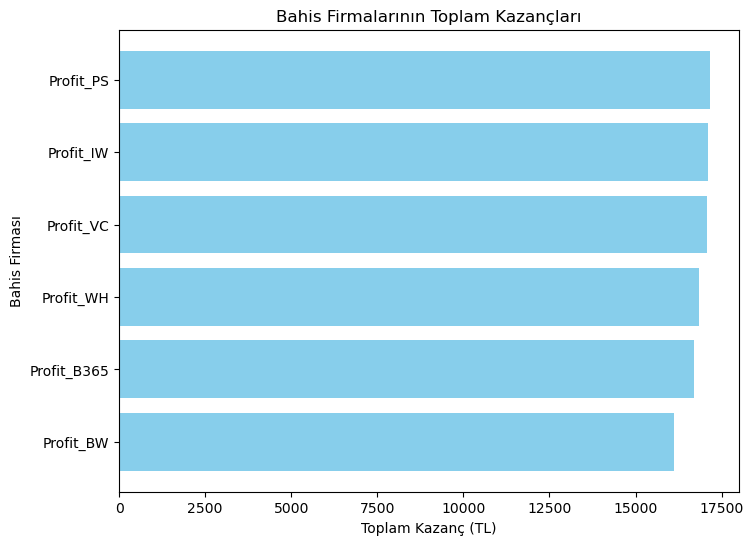

In [546]:
import matplotlib.pyplot as plt

# Bahis firmalarının profit sütunlarını toplama
profit_columns = ['Profit_B365', 'Profit_BW', 'Profit_IW', 'Profit_WH', 'Profit_VC', 'Profit_PS']
total_profit = dfprofit[profit_columns].sum()

# Veriyi düzenleme
profit_data = pd.DataFrame({'Bahis Firması': total_profit.index, 'Toplam Kazanç': total_profit.values})

# Büyükten küçüğe sıralama
profit_data = profit_data.sort_values(by='Toplam Kazanç', ascending=True)

# Yatay bar grafiği oluşturma
plt.figure(figsize=(8, 6))
plt.barh(profit_data['Bahis Firması'], profit_data['Toplam Kazanç'], color='skyblue')
plt.title('Bahis Firmalarının Toplam Kazançları')
plt.xlabel('Toplam Kazanç (TL)')
plt.ylabel('Bahis Firması')
plt.show()

#### En başarılı(!) Galibiyet - Mağlubiyet bahsi sitesi 17151 Dolar ile PS(Pinnacle Sports) oldu
#### Fakat biz bu yola 38000 Dolar ile başlamıştık yani %45 zarardayız

In [ ]:
Key to results data:
Div = League Division
Date = Match Date (dd/mm/yy)
HomeTeam = Home Team
AwayTeam = Away Team
FTHG = Full Time Home Team Goals
FTAG = Full Time Away Team Goals
FTR = Full Time Result (H=Home Win, D=Draw, A=Away Win)
HTHG = Half Time Home Team Goals
HTAG = Half Time Away Team Goals
HTR = Half Time Result (H=Home Win, D=Draw, A=Away Win)

Match Statistics (where available)
Attendance = Crowd Attendance
Referee = Match Referee
HS = Home Team Shots
AS = Away Team Shots
HST = Home Team Shots on Target
AST = Away Team Shots on Target
HHW = Home Team Hit Woodwork
AHW = Away Team Hit Woodwork
HC = Home Team Corners
AC = Away Team Corners
HF = Home Team Fouls Committed
AF = Away Team Fouls Committed
HO = Home Team Offsides
AO = Away Team Offsides
HY = Home Team Yellow Cards
AY = Away Team Yellow Cards
HR = Home Team Red Cards
AR = Away Team Red Cards
HBP = Home Team Bookings Points (10 = yellow, 25 = red)
ABP = Away Team Bookings Points (10 = yellow, 25 = red)

Key to 1X2 (match) betting odds data:
B365H = Bet365 home win odds       
B365D = Bet365 draw odds
B365A = Bet365 away win odds
BSH = Blue Square home win odds
BSD = Blue Square draw odds
BSA = Blue Square away win odds
BWH = Bet&Win home win odds
BWD = Bet&Win draw odds
BWA = Bet&Win away win odds
GBH = Gamebookers home win odds     
GBD = Gamebookers draw odds
GBA = Gamebookers away win odds
IWH = Interwetten home win odds        
IWD = Interwetten draw odds
IWA = Interwetten away win odds
LBH = Ladbrokes home win odds       
LBD = Ladbrokes draw odds
LBA = Ladbrokes away win odds
PSH = Pinnacle Sports home win odds
PSD = Pinnacle Sports draw odds
PSA = Pinnacle Sports away win odds
SOH = Sporting Odds home win odds
SOD = Sporting Odds draw odds
SOA = Sporting Odds away win odds
SBH = Sportingbet home win odds  
SBD = Sportingbet draw odds
SBA = Sportingbet away win odds
SJH = Stan James home win odds    
SJD = Stan James draw odds
SJA = Stan James away win odds
SYH = Stanleybet home win odds  
SYD = Stanleybet draw odds
SYA = Stanleybet away win odds
VCH = VC Bet home win odds
VCD = VC Bet draw odds
VCA = VC Bet away win odds
WHH = William Hill home win odds
WHD = William Hill draw odds
WHA = William Hill away win odds